In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pyvista as pv
from matplotlib import ticker, cm

plt.style.use('dark_background')

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [6, 6]

%matplotlib inline

In [13]:
# Define complex plane
z_r = np.linspace(-15.0, 15.0, num=250)
z_i = np.linspace(-np.pi, 0.5 * np.pi, num=250)
z = ( np.tensordot(z_r, np.ones_like(z_i), axes=0) + 
      1.0j*np.tensordot(np.ones_like(z_r), z_i, axes=0) )

X, Y = np.tensordot(z_r, np.ones_like(z_i), axes=0), np.tensordot(np.ones_like(z_r), z_i, axes=0)

In [23]:
def Z(z):
    return 1j * np.sqrt(np.pi) * np.exp(-z**2.0) * (1.0 + sp.erf(1j * z))

def Zprime(z):
    return -2 * (1 + z * Z(z))

def fac(n):
    return np.math.factorial(n)

def shifted_disp_para(zeta, n, k_para):
    return sum([(-1)**s / (fac(n+s) * fac(n-s)) * Zprime(zeta - s/k_para)
               for s in range(-n+1-1, n+1)])

def shifted_disp_perp(zeta, n, k_parap):
    return sum([s * (-1)**s / (fac(n+s) * fac(n-s)) * Z(zeta - s/k_para)
               for s in range(-n+1-1, n+1)])

def V_parallel(z, k_perp, k_para, terms):
    arg = -2.0 * k_perp**2.0
    return -1.0 * sum([
        sp.poch(0.5, n) * sp.poch(1, n) / fac(n) * shifted_disp_para(z, n, k_para) * (arg) ** n
        for n in range(terms)
    ])

def V_perp(z, k_perp, k_para, terms):
    arg = -2.0 * k_perp**2.0
    return (sum([
        sp.poch(0.5, n) * sp.poch(1, n) / fac(n) * shifted_disp_perp(z, n, k_para) * (arg) ** n
        for n in range(terms)
    ]) + 1)

# Parallel part only:
### Close to parallel

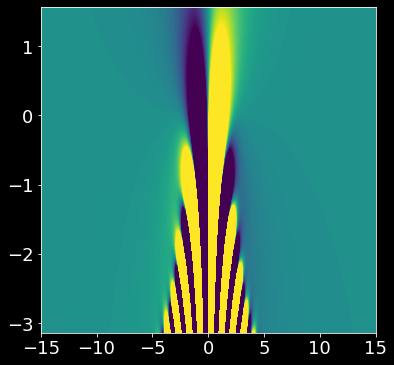

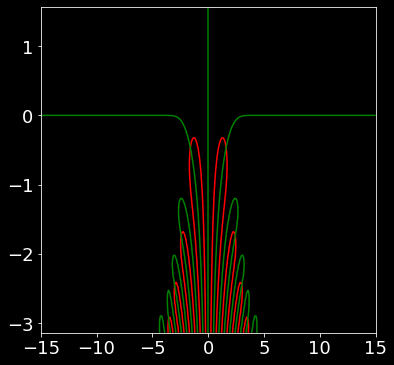

In [24]:
k_para = 0.5
k_perp = 0.01
k = np.sqrt(k_para ** 2.0 + k_perp ** 2.0)

func = (1 + V_parallel(z, k_perp, k_para, terms=5)/(k**2.0) + 
        V_perp(z, k_perp, k_para, terms=5)/(k**2.0))

cb = np.linspace(-1, 1, num=100)

plt.close('all')

plt.figure()
plt.contourf(X, Y, np.imag(func), cb, extend='both')

plt.figure()
plt.contour(X, Y, np.real(func), 0, colors='r')
plt.contour(X, Y, np.imag(func), 0, colors='g')

plt.show()

### Closer to perpendicular

<ipython-input-23-64f137af9556>:2: RuntimeWarning: invalid value encountered in multiply
  return 1j * np.sqrt(np.pi) * np.exp(-z**2.0) * (1.0 + sp.erf(1j * z))
<ipython-input-23-64f137af9556>:5: RuntimeWarning: invalid value encountered in multiply
  return -2 * (1 + z * Z(z))
<ipython-input-23-64f137af9556>:15: RuntimeWarning: invalid value encountered in multiply
  return sum([s * (-1)**s / (fac(n+s) * fac(n-s)) * Z(zeta - s/k_para)


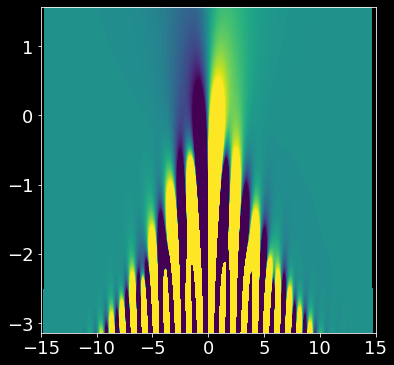

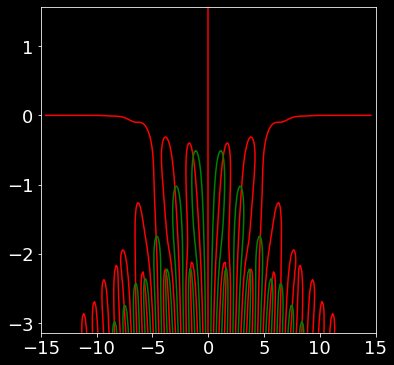

In [25]:
k_para = 0.5
k_perp = 0.5
k = np.sqrt(k_para ** 2.0 + k_perp ** 2.0)

func = (1 + V_parallel(z, k_perp, k_para, terms=7)/(k**2.0) +
        V_perp(z, k_perp, k_para, terms=7)/(k**2.0))

cb = np.linspace(-1, 1, num=100)

plt.close('all')

plt.figure()
plt.contourf(X, Y, np.imag(func), cb, extend='both')

plt.figure()
plt.contour(X, Y, np.imag(func), 0, colors='r')
plt.contour(X, Y, np.real(func), 0, colors='g')
plt.show()

### Almost fully perpendicular

<ipython-input-23-64f137af9556>:2: RuntimeWarning: invalid value encountered in multiply
  return 1j * np.sqrt(np.pi) * np.exp(-z**2.0) * (1.0 + sp.erf(1j * z))
<ipython-input-23-64f137af9556>:5: RuntimeWarning: invalid value encountered in multiply
  return -2 * (1 + z * Z(z))
<ipython-input-23-64f137af9556>:15: RuntimeWarning: invalid value encountered in multiply
  return sum([s * (-1)**s / (fac(n+s) * fac(n-s)) * Z(zeta - s/k_para)


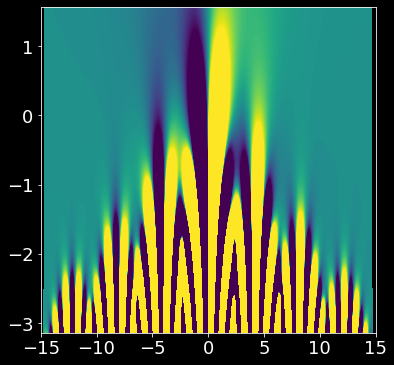

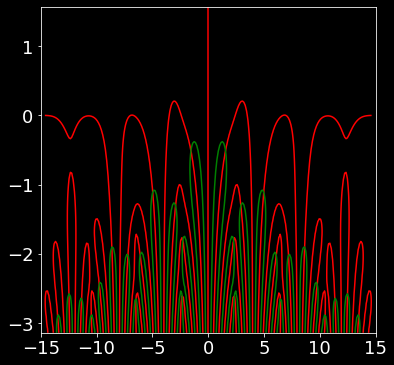

In [26]:
k_para = 0.25
k_perp = 0.4
k = np.sqrt(k_para ** 2.0 + k_perp ** 2.0)

func = (1 + V_parallel(z, k_perp, k_para, terms=4)/(k**2.0) +
        V_perp(z, k_perp, k_para, terms=4)/(k**2.0))

cb = np.linspace(-1, 1, num=100)

om_r = X#*k_parallel
om_i = Y#*k_parallel

plt.figure()
plt.contourf(om_r, om_i, np.imag(func), cb, extend='both')

plt.figure()
plt.contour(om_r, om_i, np.imag(func), 0, colors='r')
plt.contour(om_r, om_i, np.real(func), 0, colors='g')
plt.show()